# Resumo Capítulo 3: Modulação AM

Discente: João Lucas Santos Azevedo

Matrícula: 202033940032

#### O que é a modulação AM convencional? Quais os prós e contras?

#### O que é e como funciona um detector de envelope?

#### O que é a modulação AM DSB-SC? Por que usar?

#### O que é e como funciona um detector coerente?

#### O que é modulação AM SSB? Por que usar?

## Introdução
Dentro do contexto de comunicações, o foco principal dessa área de estudo é a transmissão e captação de **mensagens**. Para que isso seja possível, é necessário não apenas a mensagem a ser transmitida, mas também é necessário o uso de uma onda de maior potência que a mensagem, chamada de **portadora**.

A portadora serve como um meio pelo qual a mensagem é transmitida, visto que sozinha, a mesma não teria potência o suficiente para percorrer grandes distâncias sem ser completamente dissipada pelas perdas do meio. Essa portadora é muitas vezes uma onda senoidal, independente da mensagem, em cima da qual é aplicado um processo chamado **modulação**.

Nesse contexto, nossa principal preocupação é criar um meio de transmitir a mensagem através da portadora, de modo viável tendo em mente a **potência transmitida** e a **largura de faixa** utilizadas nessa transmissão.

##### **O que é modulação ?**
Modulação é o processo pelo qual uma característica da portadora é variada em função da mensagem que desejamos transmitir. Esse processo é utilizado no intuito de que seja possível transmitir a mensagem de um modo que ela possa ser recebida e interpretada adequadamente no lado do receptor. Neste capítulo, trataremos apenas da modulação de ondas analógicas (contínuas).

As duas principais grandezas variadas na modulação de ondas contínuas são a amplitude e a fase da forma de onda da portadora. Cada forma de modulação apresenta benefícios práticos diferentes.

---
### 3.1 Modulação em Amplitude
---

#### **Análise no Dominio do Tempo**

Considere uma onda portadora senoidal c(t) definida por:
$$
    c(t) = A_c cos(2\pi f_c t)
$$

Onde $A_c$ é a amplitude da portadora e $f_c$ é a frequência da portadora, para fim de simplificação, supomos que a fase da portadora é 0. A modulação em amplitude é formalmente definida como o processo pelo qual o valor médio da amplitude da onda portadora c(t) é variado linearmente com o sinal de mensagem m(t).

$$
    s(t) = A_c [1 + k_a m(t)] cos(2\pi f_c t)
$$

Na qual $k_a$ é uma constante chamada de sensibilidade de amplitude.

Quando utilizamos a modulação em amplitude, a informação da mensagem é reproduzida pelo "envelope" da onda modulada, ou seja, os pontos de máximo da onda modulada reproduzem a forma do sinal mensagem.

Para que possamos utilizar a modulação em amplitude, alguns critérios devem ser seguidos:

1. A amplitude de |$k_a m(t)$| deve ser sempre menor que 1.

* Essa condição garante que a função $1 + k_a m(t)$ é sempre positiva, descartando a necessidade do módulo. Além disso, essa condição evita os efeitos de sobremodulção, as quais ocasionariam em uma inversão de fase.

2. A frequência da portadora $f_c$ é muito maior do que a maior componente de frequência do sinal mensagem.

* Essa condição permite que o envelope da mensagem possa ser visualizado e interpretado adequadamente do lado do receptor.

Graficamente podemos observar o processo de modulação em amplitude na figura 1:

<center>
    <img src="https://drive.google.com/uc?export=view&id=1FRot7gZQm3w1q1MddfYZMO8BPJ9mrxTX">
</center>

Desde que as condições citadas acima sejam atentidas, o sinal pode ser demodulado utilizando-se um detector de envelope, o qual é definido como: *um dispositivo cuja saída acompanha o envelope da onda AM que atua como sinal de entrada*

#### **Análise no Dominio da Frequência**

A seguir, iremos discutir o efeito do sinal modulado em amplitude no domínio da frequência.

Seja M(f) a transformada de Fourier do sinal mensagem m(t), podemos determinar que o espectro da onda AM é dado por:

$$
    S(f) = \frac{A_c}{2}[\delta(f - f_c) + \delta(f + f_c)] + \frac{k_a A_c}{2}[M(f - f_c) + M(f + f_c)]
$$

Graficamente podemos observar o espectro do sinal modulado na figura 3.2:

<center>
    <img src="https://drive.google.com/uc?export=view&id=1K-ffbuNtknuU0zP6eFPUbatyFlnfq0RO">
</center>

Apartir desse resultado, podemos interpretar o espectro do sinal modulado como sendo 2 funções delta de Dirac com amplitude $\frac{A_c}{2}$, com os centros em $-f_c$ e $f_c$ e e duas versões do espectro de mensagem transladadas em freqüência por ±fc e escalonadas em amplitude por
kaAc/2. Esse resultado nos revela 3 coisas:

1. Desde que a frequência da portadora seja maior do que a da mensagem ($f_c$ > W) , o espectro do sinal da mensagem torna-se completamente visível para frequências de -W a 0.

2. Para freqüências positivas, a porção do espectro de uma onda AM acima da frequência da portadora fc é chamada de faixa lateral superior, enquanto que a porção simétrica abaixo de fc é chamada de faixa lateral inferior. A condição fc > W garante que as faixas laterais não se sobreponham. Além disso, a faixa lateral superior, a faixa lateral inferior e a portadora são completamente representadas no espectro da Fig. 3.2(b).

3. Para freqüências positivas, a componente de freqüência mais alta da onda AM é igual a fc + W, e a componente mais baixa de freqüência é fc – W. A diferença entre estas duas freqüências define a largura de faixa de transmissão BT da onda AM, a qual é exatamente duas vezes a largura de faixa W da mensagem. Ou seja: $$B_T = 2W$$

A seguir temos um exemplo simulado do processo de modulação AM:

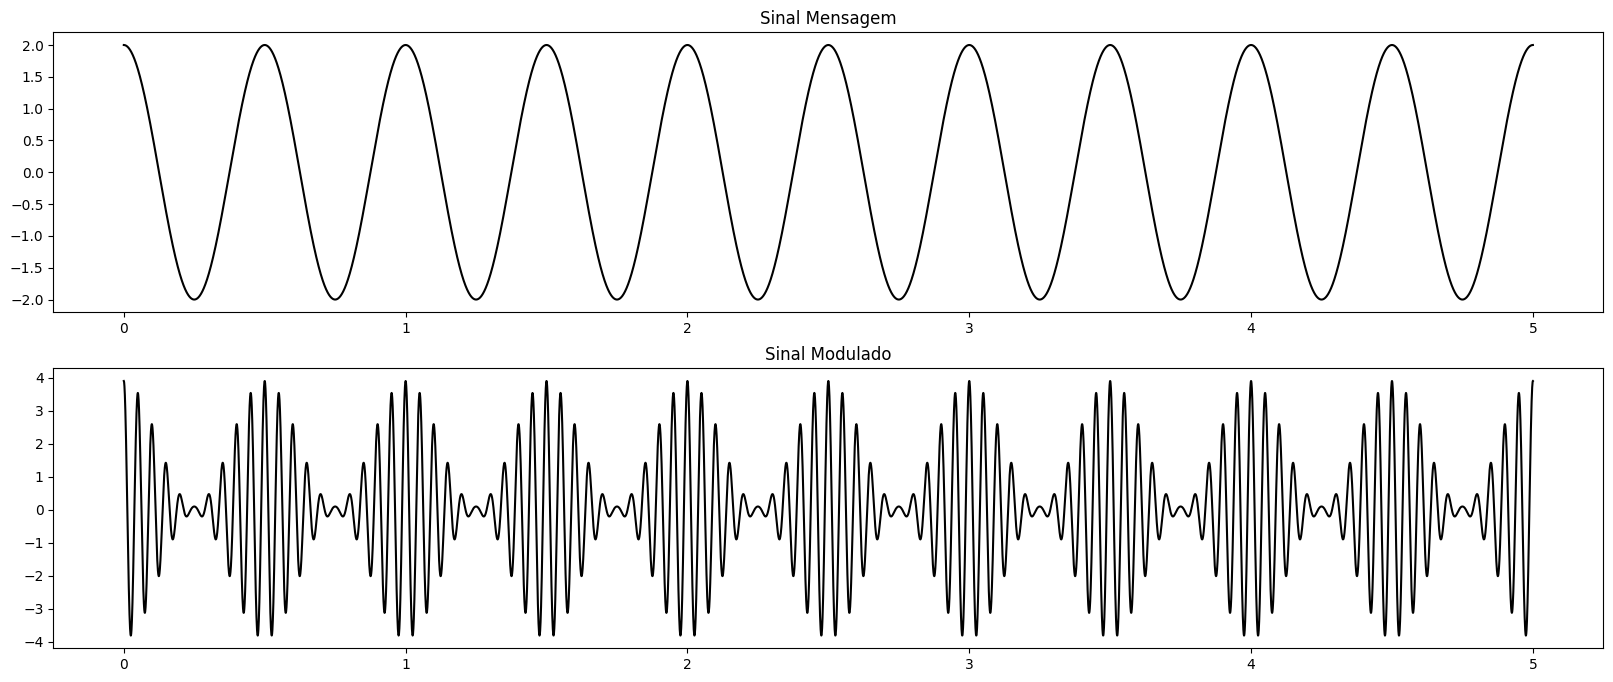

In [12]:
# Exemplo computacional
import numpy as np
import matplotlib.pyplot as plt

taxa = 20000 # Taxa de amostragem em Hz
t = np.linspace(0, 5, taxa)

# Dados da Mensagem
Am = 2
m = np.zeros(len(t))
fm = 2
for i in range(len(t)):
    A = Am*np.cos(t[i])
    A = Am
    m[i] = A*np.cos(2*np.pi*fm*t[i])

# Dados da Portadora
Ac = Am
fc = 10*fm

# Dados do sinal modulado em amplitude
s = np.zeros(len(t))
ka = 0.95/Am      # 95% de modulação

for i in range(len(t)):
    s[i] = Ac * (1 + ka * m[i]) * np.cos(2*np.pi*fc*t[i])

fig1, axs1 = plt.subplots(nrows=2, ncols=1, figsize=(20,8))
axs1[0].plot(t, m, 'k')
axs1[0].set_title(f'Sinal Mensagem')
axs1[1].plot(t, s, 'k')
axs1[1].set_title(f'Sinal Modulado')
plt.show()

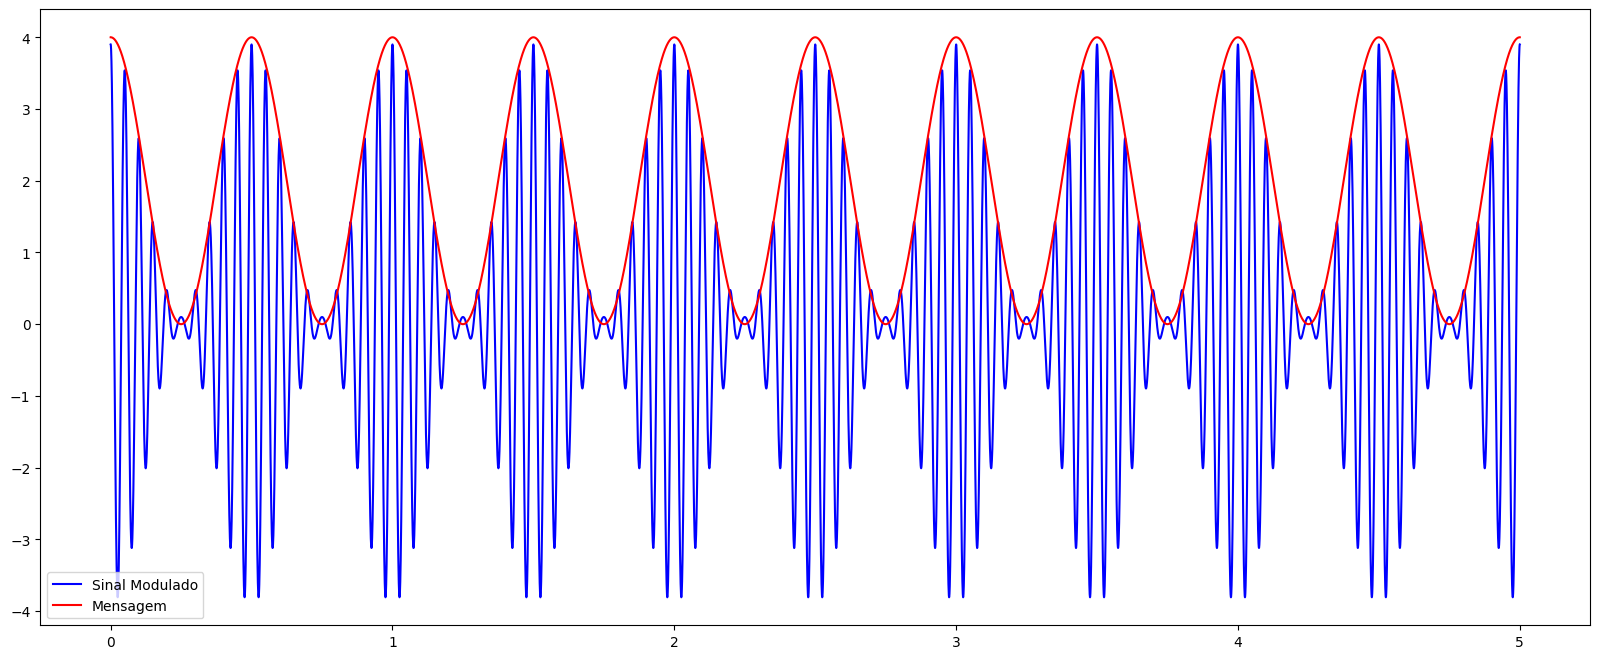

In [13]:
m_ajustada = np.zeros(len(m))
for i in range(len(m)):
    m_ajustada[i] = m[i] + Am

plt.figure(figsize=(20,8))
plt.plot(t, s, "b")
plt.plot(t, m_ajustada, "r")
plt.legend(["Sinal Modulado", "Mensagem"])
plt.show()

norm =  20000.49178762537


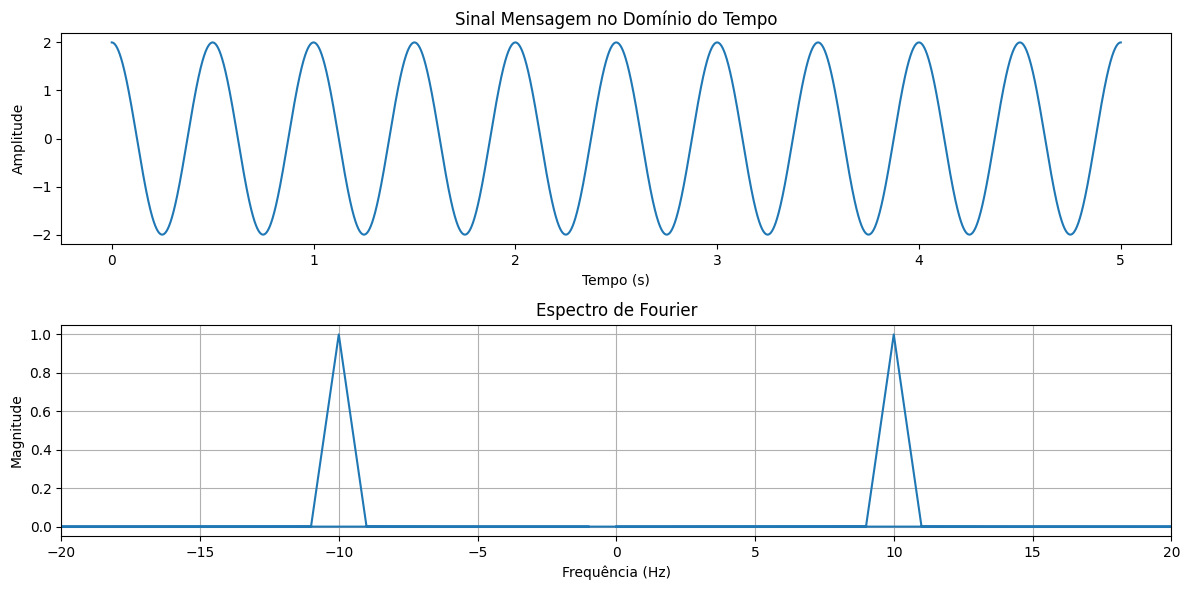

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a Transformada de Fourier
espectro = np.fft.fft(m)
frequencias = np.fft.fftfreq(len(espectro), 1 / taxa)

# Normalizando o gráfico
norm = max(abs(espectro))
print("norm = ", norm)

limites = []
for freq, amp in zip(frequencias, espectro):
    if amp/norm > 0.1:
        limites.append(freq)

# Plotar o sinal no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, m)
plt.title('Sinal Mensagem no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

# Plotar o espectro no domínio da frequência
plt.subplot(2, 1, 2)
plt.plot(frequencias, np.abs(espectro)/norm)
plt.title('Espectro de Fourier')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.xlim(2*limites[int(len(limites)-1)], 2*limites[0])
plt.grid()

plt.tight_layout()
plt.show()

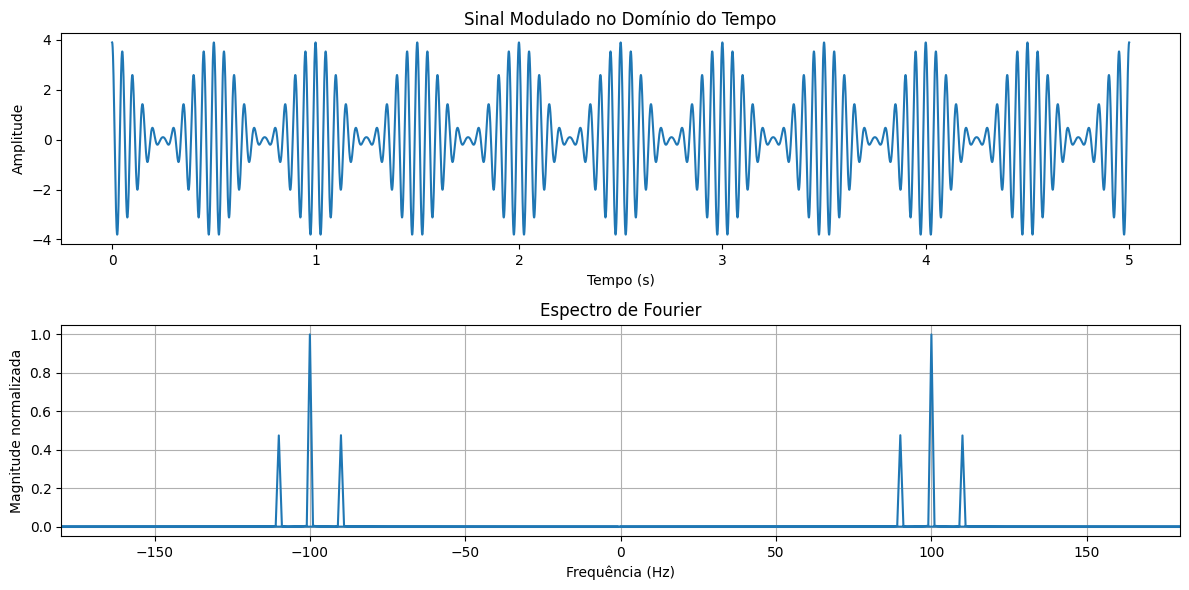

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular a Transformada de Fourier
espectro = np.fft.fft(s)
frequencias = np.fft.fftfreq(len(espectro), 1 / taxa)

# Normalizando o gráfico
norm = max(abs(espectro))

limites = []
for freq, amp in zip(frequencias, espectro):
    if amp/norm > 0.1:
        limites.append(freq)

# Plotar o sinal no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Sinal Modulado no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

# Plotar o espectro no domínio da frequência
plt.subplot(2, 1, 2)
plt.plot(frequencias, np.abs(espectro)/norm)
plt.title('Espectro de Fourier')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude normalizada')
plt.xlim(2*limites[int(len(limites)-1)], 2*limites[0])
plt.grid()

plt.tight_layout()
plt.show()

Na prática, o sinal modulado é uma onda de tensão ou corrente. Em qualquer um dos casos, a potência média entregue em um resistor de 1 ohm por s(t) é composta por três
componentes:
$$
    \text{Potência da portadora} = \frac{1}{2}A^2_c \\[10pt]
    \text{Potência da frequência lateral superior} = \frac{1}{8}\mu^2 A^2_c \\[10pt]
    \text{Potência da frequência lateral inferior} = \frac{1}{8}\mu^2 A^2_c
$$

Na prática, esses valores são escalonados por R ou 1/R dependendo da natureza do sinal. Em qualquer caso, a relação da potência total das faixas laterais pela potência total na onda modulada é igual a $\frac{μ^2}{2 + μ^2}$, a qual depende somente do fator de modulação μ.

#### **Detecção de Envelope**

O processo de modulação AM é simples e eficaz, sua simplicidade é ressaltada quando consideramos a demodulação AM, a qual é o inverso da modulação.
A implementação da demodulação AM é feita de forma altamente eficaz e sem grandes complexidades utilizando-se um circuito chamado detector de envelope, o qual deve seguir as seguintes especificações:

1. A frequência da portadora deve ser grande quando comparada com a da mensagem.
2. O percentual de modulação deve ser menor do que 100%.

Um exemplo simples de um detector de envelope do tipo série é um circuito constituído de um diodo em série com um filtro RC. O seu funcionamento consiste no carregamento rápido e descarregamento lento do capacitor em cima do resistor de saída de modo a tensão apresentada na saída reproduzir o sinal formado pelos picos do sinal modulado.

Para que essa operação seja alcançada, é necessário ajustar a constante de tempo de carregamento do circuito para que ela seja pequena quando comparada com o período da portadora, assim:
$$
    (r_f + R_s)C << \frac{1}{f_c}
$$

Onde:
* $r_f$ é a resistência do diodo polarizado diretamente
* $R_s$ é a resistência da fonte de tensão gerando o sinal
* C é a capacitância do capacitor usado no filtro

Já a constante de tempo de descarga deve ser ajustada de modo a ser grande o suficiente para garantir que o capacitor se descarregue
lentamente através do resistor de carga $R_l$ entre os picos positivos da onda portadora, mas não tão grande a ponto da tensão do capacitor não diminuir à máxima taxa de variação da onda modulante, ou seja:

$$
    \frac{1}{f_c} << R_l C << \frac{1}{W}
$$

Onde:
* $f_c$ é a frequência da portadora
* $R_l$ é a resistência da fonte de tensão gerando o sinal
* C é a capacitância do capacitor usado no filtro
* W é a largura de faixa da mensagem

---
### 3.2 Virtudes, Limitações e Modificações na Modulação em Amplitude
---
A modulação em amplitude é um método fácil de ser gerado e invertido. O resultado final é que o sistema de modulação em amplitude é relativamente barato de ser
construído.

Entretanto, como mencionado na introdução, nossas principais preocupações são o uso eficiente de potência e a largura de faixa. Nesse contexto observamos que a modulação em amplitude sofre de duas grandes limitações práticas:

1. A modulação em amplitude desperdiça potência transmitida. A onda portadora c(t) é completamente independente do sinal m(t) contendo a informação. A transmissão da onda portadora, portanto, representa um desperdício de potência, o que significa que na modulação em amplitude somente uma fração da potência total transmitida é realmente afetada por m(t).

2. A modulação em amplitude desperdiça a largura de faixa do canal. Podemos determinar unicamente a faixa negativa do sinal utilizando sua faixa positiva, isso nos mostra que somente uma largura de faixa ifual a do sinal da mensagem é suficiente para a transmissão.

Para superar estas duas limitações do AM, devemos fazer certas modificações que resultam no aumento da complexidade do sistema do processo de modulação em amplitude. De fato, trocamos a complexidade do sistema pela melhor utilização dos recursos da comunicação. Começando com a modulação em amplitude, podemos distinguir três modificações na modulação:

1. Modulação de faixa lateral dupla – portadora suprimida (DSB-SC), na qual a onda transmitida é constituída somente das faixas laterais superior e inferior. A potência transmitida é salva através da supressão da onda portadora, no entanto, utiliza-se duas vezes a largura de faixa da mensagem.

2. Modulação de faixa lateral única (SSB), na qual a onda modulada é constituída somente da faixa lateral superior ou da faixa lateral inferior. A função essencial da modulação SSB é, portanto, transladar o espectro do sinal modulante (com ou sem inversão) para uma nova posição no domínio da freqüência. A SSB é a forma ótima da modulação de onda contínua, no sentido de que ela requer o mínimo de potência transmitida e o mínimo de largura de faixa do canal. Sua principal desvantagem é o aumento na complexidade e aplicabilidade limitada.

3. Modulação de faixa lateral vestigial (VSB), na qual uma faixa lateral é transmitida quase que completamente, juntamente com somente um traço, ou um vestígio, da outra. A largura de faixa do canal é, portanto, maior do que a largura de faixa da mensagem por um total igual a largura da faixa lateral vestigial. Seu processo de demodulação é simplificado comparado ao SSB.


---
### 3.3 Modulação de Faixa Lateral Dupla – Portadora Suprimida
---
Basicamente, a modulação de faixa lateral dupla-portadora suprimida, consiste do produto do sinal de mensagem m(t) pela onda portadora c(t) como mostrado pela equação:
$$
    s(t) = c(t)m(t)\\
    s(t) = A_c cos(2\pi f_c t)m(t)
$$
Desta forma, o dispositivo utilizado para gerar a onda DSB-SC é chamado de modulador de produto. Da Eq. (3.8) também notamos que, ao contrário da modulação em amplitude, a modulação DSB-SC é reduzida para zero quando o sinal de mensagem m(t) é desligado.

O mais importante, entretanto, está no fato do sinal modulado s(t) sofrer uma inversão de fase sempre que o sinal de mensagem m(t) cruzar o zero, como indicado na Fig. 3.10(b) para o sinal de mensagem m(t) mostrado na parte (a) desta figura. O envelope de um sinal modulado DSB-SC é, portanto, diferente do sinal de mensagem, o que significa que a demodulação simples usando um detector de envelope não é uma opção viável para a modulação DSB-SC.

Da Eq. (3.8), a transformada de Fourier de s(t) é obtida como:
$$
    S(f) = \frac{1}{2}A_c[M(f - f_c) + M(f + f_c)]
$$

Esse resultado explicita que o processo de modulação translada o espectro do sinal de mensagem por $\pm f_c$ para a direita e para a esquerda. É notório que a largura de faixa de transmissão é a mesma da modulação em amplitude, ou seja, 2W.

Resumindo, do ponto de vista da ocupação da largura de faixa, a DSB-SC não oferece vantagem frente ao AM. Sua única vantagem está no fato de salvar potência transmitida, o que já é suficientemente importante quando a potência transmitida estiver em prêmio. O espectro de Fourier do sinal é mostrado na figura 3.11 a seguir

<center>
    <img src="https://drive.google.com/uc?export=view&id=1wCNgTxOydkZ3go0Qv5oCxw4PQsxTnLtt">
</center>

#### **Detecção Coerente**

Devido a sua forma de onda diferente da modulação AM, não podemos utilizar um simples detector de envelope para fazer a recuperação do sinal, ao invés disso, devemos desenvolver um novo método para isso.

Para isso iremos analisar o espectro da mensagem no domínio da frequência, e após aplicar as devidas identidades trigonométricas chegamos em:

$$
 v(t) = \frac{1}{2}A_c A'_c \cos{(4\pi f_c t + \phi)}m(t) + \frac{1}{2}A_c A'_c \cos{(\phi)}m(t)
$$

O primeiro termo da equação representa um novo sinal modulado DSB-SC com frequência $2f_c$, enquanto o segundo termo é proporcional à mensagem. Esse sinal é então filtrado de modo a eliminarmos as componentes da portadora, as quais foram deslocadas para esquerda e para direita no domínio da frequência, como mostrado na figura 3.13.

<center>
    <img src="https://drive.google.com/uc?export=view&id=1ZBVXHVWxPBf36eAUhb9OwtkBswQgA76p">
</center>

Após a filtragem, obtemos na saída do filtro o sinal correspondente à equação:
$$
v_o(t) = \frac{1}{2}A_c A'_c \cos{(\phi)}m(t)
$$

O sinal demodulado é portanto proporcional a $m(t)$ para $\phi$ constante. O problema dessa técnica no entanto, é que na prática o valor de $\phi$ é um fator variante de maneira aleatória no tempo devido a variações aleatória no canal de comunicação. É necessário portanto criar um aparato mais complexo e robusto para que haja um controle desse fator, o que torna-se o preço a se pagar para salvar a potência transmitida.

---
### 3.4 Receptor Costas
---

A detecnão coerente de uma onda DSB-SC requer que ambas as portadoras entrejam sincronizadas em frequência e fase, tanto no receptor quanto no transmissor. Em vista dessa exigência, foi desenvolvido um circuito específico para controlar os desvios de fase da mensagem, o qual é conhecido como ***Receptor Costas***.

Esse circuito é constituido de dois detectores coerentes possuindo a onda DSV-SC como sinal de entrada, mas com dois sinais osciladores, possuindo a mesma frequência da onda portadora, que estão em quadratura de fase entre eles. O projeto desse circuito pode ser visto da figura 3.16:

<center>
    <img src="https://drive.google.com/uc?export=view&id=1E0ETtJZfEQMHujbzU-nwfYaVZuk_J_u2">
</center>

O receptor costas funciona com base na comparação de sinais, efeito nulo de quadratura e na realimentação do seu circuito. Os canais I e Q são alimentados pelo mesmo sinal, o qual é multiplicado em cada entrada por um sinal senoidal com a mesma frequência da portadora mas desafagem de 90º entre si, esse sinal é em seguida comparado por um discriminador de fase, o qual corrige o erro referente ao desvio aleatório de fae, fazendo assim com que o sinal da saída seja própria demodulação da mensagem.

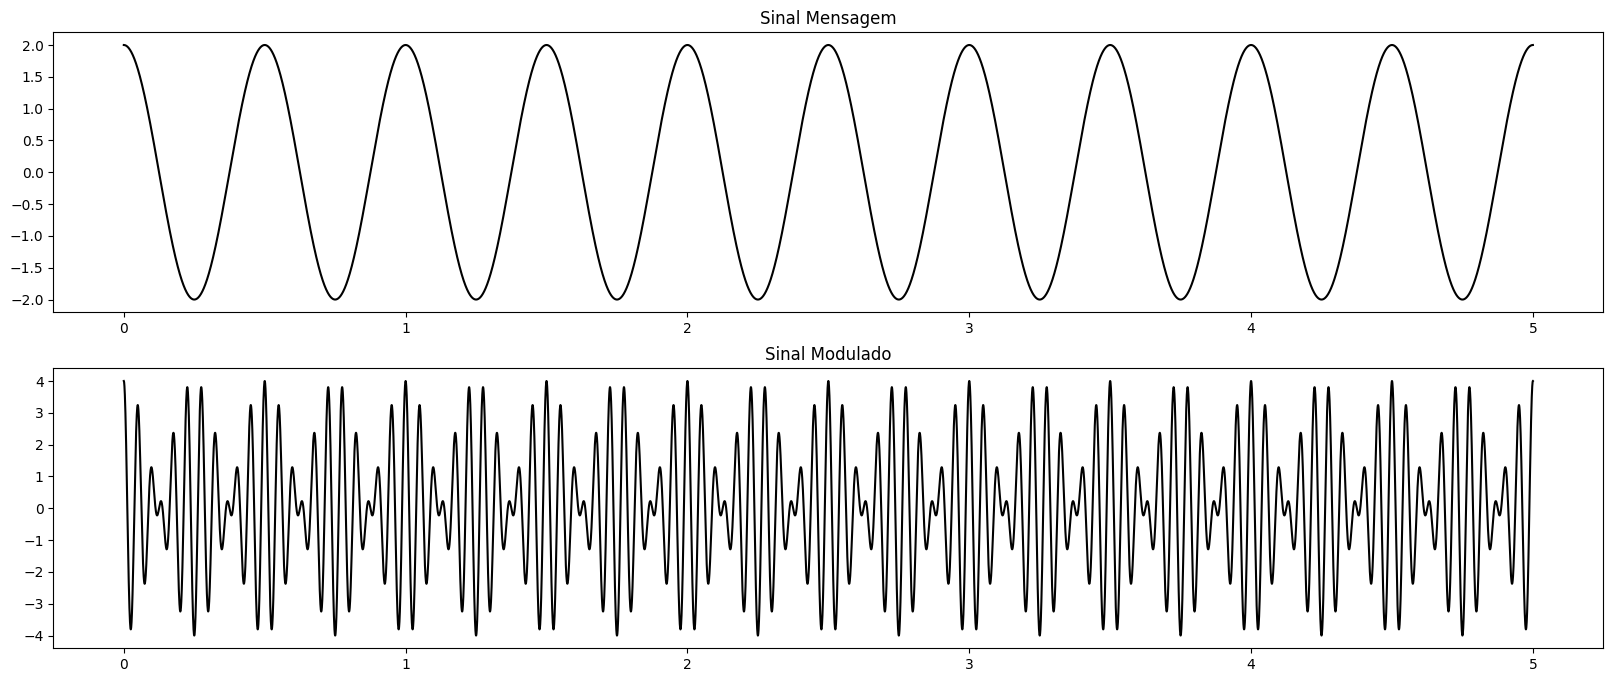

In [16]:
# Exemplo computacional
import numpy as np
import matplotlib.pyplot as plt

taxa = 20000 # Taxa de amostragem em Hz
t = np.linspace(0, 5, taxa)

# Dados da Mensagem
Am = 2
m = np.zeros(len(t))
fm = 2
for i in range(len(t)):
    A = Am
    m[i] = A*np.cos(2*np.pi*fm*t[i])

# Dados da Portadora
Ac = Am
fc = 10*fm

# Dados do sinal modulado em amplitude
s = np.zeros(len(t))
ka = 0.95/Am      # 95% de modulação

for i in range(len(t)):
    s[i] = Ac * np.cos(2*np.pi*fc*t[i]) * m[i]

fig1, axs1 = plt.subplots(nrows=2, ncols=1, figsize=(20,8))
axs1[0].plot(t, m, 'k')
axs1[0].set_title(f'Sinal Mensagem')
axs1[1].plot(t, s, 'k')
axs1[1].set_title(f'Sinal Modulado')
plt.show()

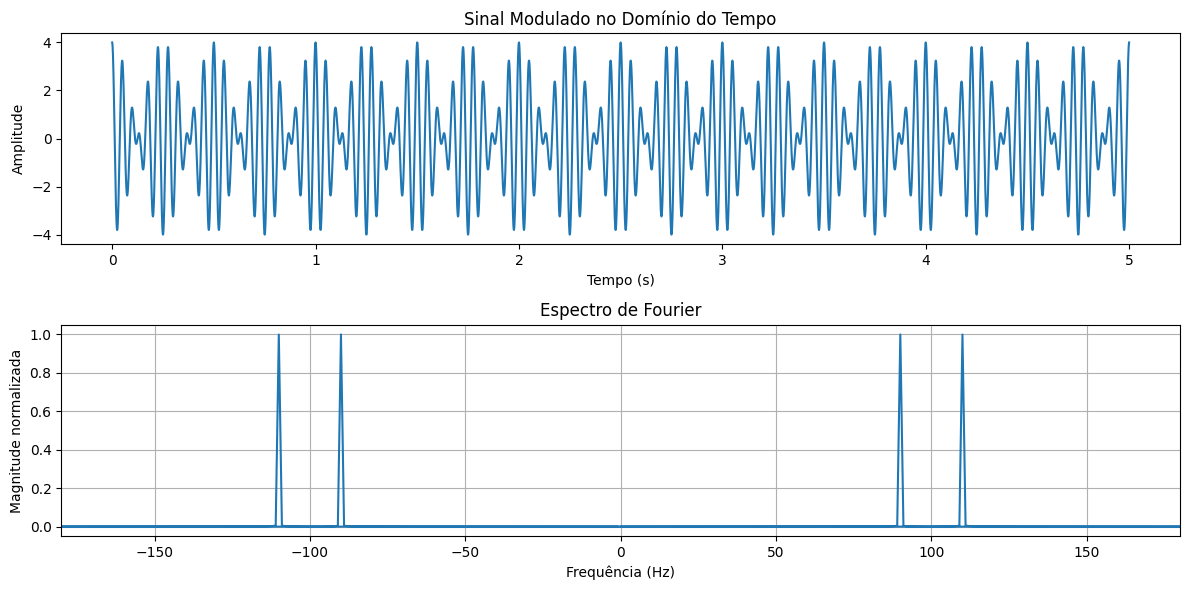

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Calcular a Transformada de Fourier
espectro = np.fft.fft(s)
frequencias = np.fft.fftfreq(len(espectro), 1 / taxa)

# Normalizando o gráfico
norm = max(abs(espectro))

limites = []
for freq, amp in zip(frequencias, espectro):
    if amp/norm > 0.1:
        limites.append(freq)

# Plotar o sinal no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Sinal Modulado no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

# Plotar o espectro no domínio da frequência
plt.subplot(2, 1, 2)
plt.plot(frequencias, np.abs(espectro)/norm)
plt.title('Espectro de Fourier')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude normalizada')
plt.xlim(2*limites[int(len(limites)-1)], 2*limites[0])
plt.grid()

plt.tight_layout()
plt.show()

---
### 3.5 Multiplexação por Portadora em Quadratura
---

O efeito nulo de quadratura do detector coerente pode ter uma boa utilidade na construção do chamado multiplexação por portadora em quadratura ou modulação de amplitude em
quadratura (QAM). Este esquema permite que duas ondas DSB-SC ocupem a mesma largura de faixa do canal. Esse sistema permite portanto a conservação de largura de faixa.

A construção do sistema que realizar essa modulação consiste no uso de dois moduladores de de produto separados que são supridos com duas ondas portadoras de mesma freqüência mas com uma diferença de fase de –90 graus. O resultado é explicitado na equação:

$$
    s(t) = A_c m_1(t)cos(2\pi f_c t) + A_c m_2(t)sen(2\pi f_c t)
$$

Onde $m_1$ e $m_2$ são as mensagens transmitidas pela largura de faixa do canal de 2W.

O sinal é demolarizado utilizando-se 2 detectores coerentes separados, supridos por duas ondas senoidais com a mesma frequência da portadora e defasagem de -90 graus entre si. Para que o sistema funcione de maneira satisfatória, é utilizando um Detector Costas, o qual é responsável pelo ajuste de fase na saída.

O esquema de construção dos sistema é mostrado na figura 3.17 abaixo:

<center>
    <img src="https://drive.google.com/uc?export=view&id=1fpVfPdKivCE5AXxkc5Vqnp4DZSPYKZxV">
</center>

---
### 3.6 Modulação por Faixa Lateral Única
---

Com a supressão da portadora, a modulação DSB-SC soluciona a principal limitação do AM, a qual era o desperdício da potência transmitida. Para resolver o problema da largura de faixa utilizada, surge então o SSB, o qual utiliza apenas a faixa lateral inferior ou superior para transmissão. Ela pode ser dividida em SSB inferior ou superior dependendo de qual faixa for transmitida.



#### **Moduladores para SSB**
#### **Detecção coerente de SSB**
#### **Translação em freqüência**

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def fpb(sinal, fc, real):
    taxa = len(sinal)
    espectro = abs(np.fft.fft(s))
    frequencias = np.fft.fftfreq(len(espectro), 1 / taxa)
    resf = []
    resa = []
    for amp, freq in zip(espectro, frequencias):
        if freq < fc:
            resf.append(freq)
            resa.append(amp)
        else:
            resf.append(freq)
            resa.append(0)
    if real == True:
        i = 0
        while i < len(resa):
            if resf[i] < 0:
                resa[i] = 0
            i += 1
    print(resa)
    return resf, resa